In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io


dtype: uint8
shape: (408, 612, 3)
size: 749088


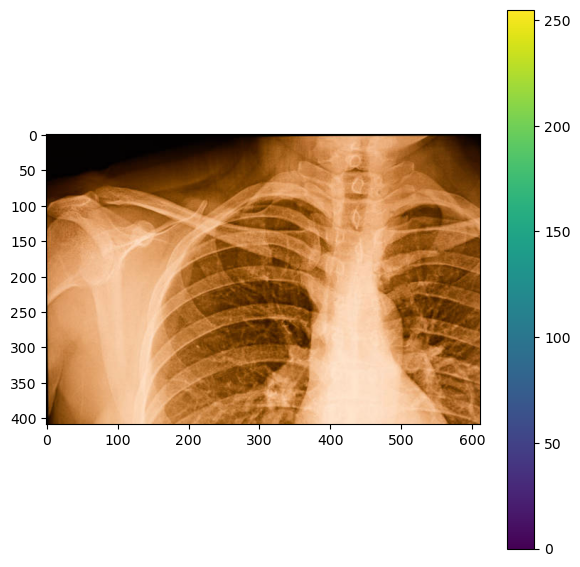

In [2]:
arch1 = "https://media.istockphoto.com/photos/human-thoracic-cavity-xray-film-picture-id1212285302?k=20&m=1212285302&s=612x612&w=0&h=B-_y6dP3yy_bLKCmXxpXkS8tH-eAqlUrXHUGALrvutM="
image = io.imread(arch1)#leo la imagen
image_1 = cv.cvtColor(image, cv.COLOR_BGR2RGB) #convierte la imagen a RGB para verse como es
imageGray = cv.cvtColor(image_1,cv.COLOR_RGB2GRAY)#la convierto en escala de grises
# Tipo de datos en la imagen
print('dtype:', image_1.dtype) #muestra el tipo de dato de la imagen
# Alto , Ancho de la imagen en píxeles , Número de canales de la imagen
print('shape:',image_1.shape)#(alto, ancho, canales) de la imagen
print('size:',image_1.size)#numero de pixeles de la imagen
plt.figure(figsize = (7,7))#establezco el tamanio de la imagen
plt.imshow(image_1)#la muestro con el cmap cool
plt.colorbar()#muestro la barra de colores

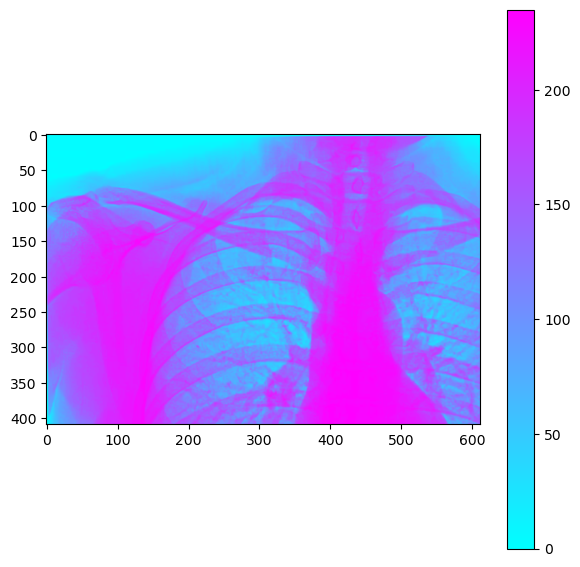

In [3]:
plt.figure(figsize = (7,7))#establezco el tamanio de la imagen
plt.imshow(imageGray, cmap='cool')#la muestro con el cmap cool
plt.colorbar()#muestro la barra de colores


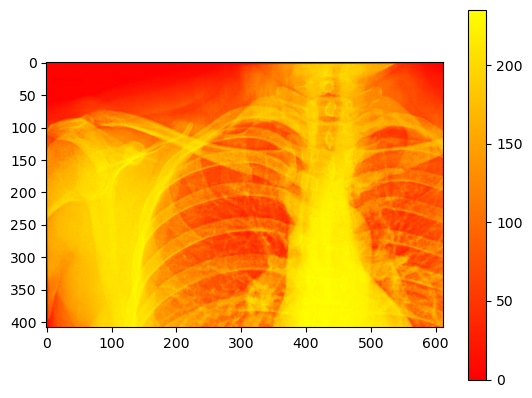

In [4]:
plt.imshow(imageGray, cmap='autumn')
plt.colorbar()

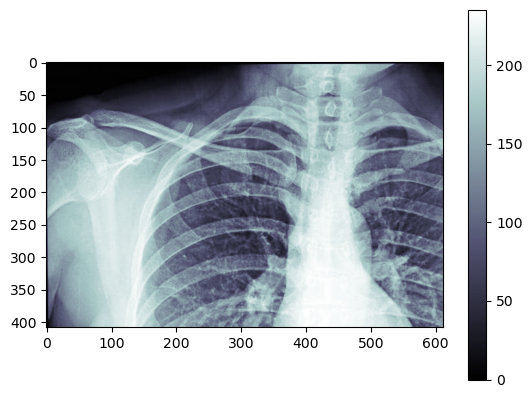

In [5]:
plt.imshow(imageGray, cmap='bone')
plt.colorbar()

(408, 612, 3)

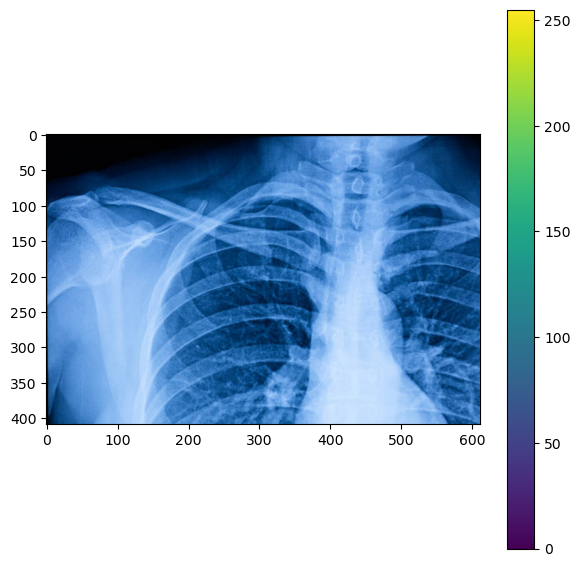

In [6]:
r,g,b = cv.split(image)
merged=cv.merge([r,g,b])
# merge takes an array of single channel matrices
plt.figure(figsize = (7,7))
plt.imshow(merged)
plt.colorbar()
merged.shape

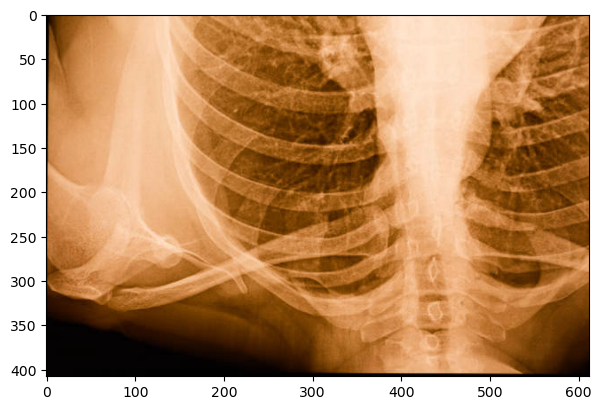

In [7]:
reflejo_0=cv.flip(image_1,0) # reflejo vertical
plt.figure(figsize = (7,7))
plt.imshow(reflejo_0)

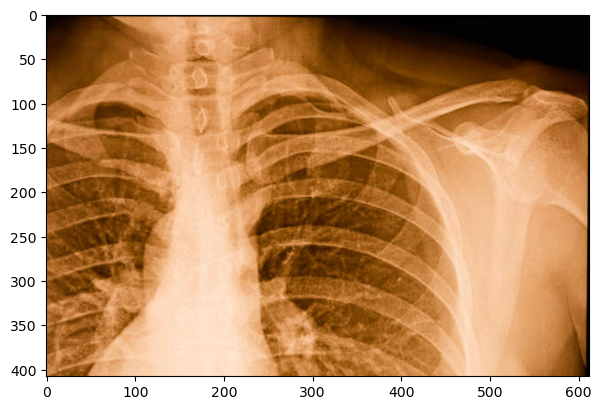

In [8]:
reflejo_1=cv.flip(image_1,1) # reflejo horizontal
plt.figure(figsize = (7,7))
plt.imshow(reflejo_1)

In [9]:
tuple(np.array(image.shape[1::-1]) / 2)

(306.0, 204.0)

In [10]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    # image_center = (100,100)
    rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv.warpAffine(image, rot_mat, image.shape[1::-1],
                           flags=cv.INTER_LINEAR)
    return result

In [11]:
for i in range(0,3):
   min_value, max_value, min_location, max_location=cv.minMaxLoc(image[:,:,i])
   print("banda {}, min {} en {} y max {} en {}".format(i,min_value, min_location, max_value, max_location))

banda 0, min 0.0 en (272, 0) y max 209.0 en (399, 383)
banda 1, min 0.0 en (292, 0) y max 231.0 en (432, 370)
banda 2, min 0.0 en (224, 0) y max 255.0 en (431, 31)


In [12]:
imageGray = io.imread('https://www.shutterstock.com/image-illustration/grayscale-elements-full-frame-decorative-600nw-2166103607.jpg')
imageGray = cv.cvtColor(imageGray,cv.COLOR_BGR2GRAY)

min_value, max_value, _, _= cv.minMaxLoc(imageGray)

imageGray_expand = (imageGray - min_value)*255/(max_value - min_value)
# plt.figure(figsize = (7,7))
cv.imshow("imagen",imageGray)
cv.waitKey(0)
cv.destroyAllWindows()
#plt.imshow(imageGray_expand, cmap='gray'), plt.colorbar()
cv.imshow("imagen",imageGray_expand)
cv.waitKey(0)
cv.destroyAllWindows()
# plt.imshow(imageGray, cmap='gray'), plt.colorbar()
# plt.figure(figsize = (7,7))
# plt.imshow(imageGray_expand, cmap='gray'), plt.colorbar()

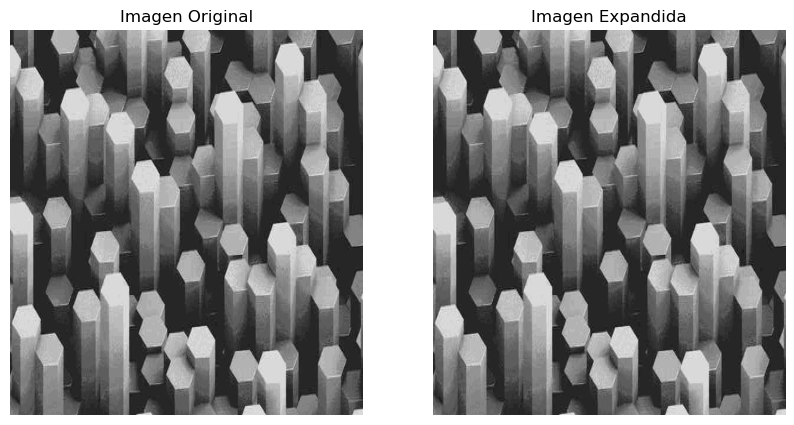

In [13]:
imageGray = io.imread('https://www.shutterstock.com/image-illustration/grayscale-elements-full-frame-decorative-600nw-2166103607.jpg')
imageGray = cv.cvtColor(imageGray, cv.COLOR_BGR2GRAY)

min_value, max_value, _, _ = cv.minMaxLoc(imageGray)

imageGray_expand = (imageGray - min_value) * 255 / (max_value - min_value)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(imageGray, cmap='gray')
ax[0].set_title('Imagen Original')
ax[0].axis('off')
ax[1].imshow(imageGray_expand, cmap='gray')
ax[1].set_title('Imagen Expandida')
ax[1].axis('off')

# Ajustar los ejes para que tengan la misma escala
ax[0].set_aspect('auto')
ax[1].set_aspect('auto')

plt.show()

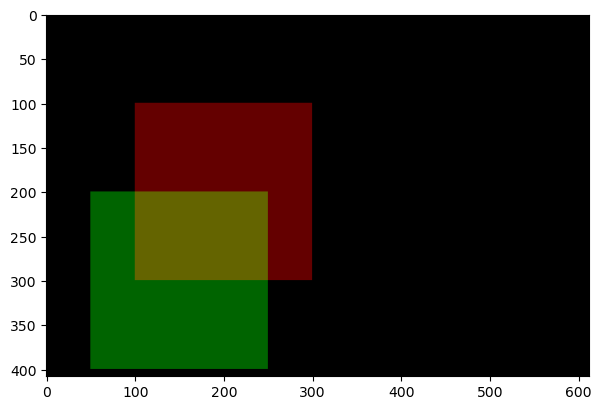

In [14]:
blank_image1 = np.zeros((image.shape), np.uint8)
blank_image1[100:300,100:300,[0]]=100; #cuadrado con valor 100

blank_image2 = np.zeros((image.shape), np.uint8)
blank_image2[200:400,50:250,[1]]=100; #cuadrado con valor 100

new_image=cv.add(blank_image1,blank_image2) # suma las dos imágenes

plt.figure(figsize = (7,7))
plt.imshow(new_image)